In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Introduction**

##**1.1 Dataset Description**

The dataset used for this analysis is the Breast Cancer Wisconsin dataset, a widely used dataset in the field of healthcare analytics. It consists of features extracted from breast mass samples, primarily aimed at classifying tumours as either benign (B) or malignant (M). Within the dataset, there are 30 feature variables computed from digitized images of fine needle aspirates (FNA) of breast masses. These features include measurements related to parameters like radius, texture, perimeter, area, smoothness, and compactness, with values provided for mean, standard error, and worst-case scenarios (mean of the three largest values).The goal of this analysis is to explore patterns within the data and identify potential clusters that may assist in the diagnosis of breast cancer.

**Dictionary**


Feature Information

ID number
Diagnosis (M = malignant, B = benign)
Features are computed for each cell nucleus:
radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximation" - 1)


##**1.2** Problem Statement

Breast cancer is a significant health concern.It is a leading cause of women's deaths, with complex diagnosis challenges. Better diagnostic methods are crucial for tailored care and reducing recurrence. Furthermore accurate diagnosis is crucial for effective treatment.


##**1.3 Objective**

The primary goal is to conduct a comprehensive EDA to gain insights into the dataset's characteristics, distributions, and potential patterns.To explore whether PCA can capture the essential information in the dataset while significantly reducing its dimensionality. Additionally, we aim to apply k-Means clustering to identify inherent clusters within the data.

##**1.4 Table of Content**



>[1. Introduction](#scrollTo=D7oFlvqAwLru)

>>[1.1 Dataset Description](#scrollTo=GAKxlIEnwSW_)

>>[1.2 Problem Statement](#scrollTo=WzChp1TlzFsX)

>>[1.3 Objective](#scrollTo=C2S-ct-KzE_v)

>>[1.4 Table of Content](#scrollTo=eBJBQmTpzI0l)

>[2. Data Loading](#scrollTo=j8HcVyNvwyKB)

>>[2.1 Importing Libraries](#scrollTo=PnAU5z0C5mbS)

>[3. Exploratory Data Analysis](#scrollTo=xp0s0WTyjsiF)

>>[3.1. Data overview](#scrollTo=tZn3zkpBteFd)

>>[3.2 Visualizations](#scrollTo=GC0NOUpCt38L)

>>>[3.2.1. Univariate analysis](#scrollTo=O3Z6hKUUPqo5)

>>>[3.2.2. Bivariate analysis](#scrollTo=xZ1Vsg4ZP9Ug)

>>>[3.2.3. Correlation analysis](#scrollTo=MjLWuKvYREXv)

>>[3.3. Missing values](#scrollTo=BqAd95K2RRUG)

>[4. Data Pre-processing](#scrollTo=o2x9C49p9kOk)

>>[4.1. Handling missing values and duplicates](#scrollTo=1ttV4D9Tl6i1)

>>[4.2.Encoding categorical variables](#scrollTo=fUSIPVxellzp)

>>[4.3. Data Preprocessing](#scrollTo=R6o-qdoKmfjP)

>>[4.4. Data Splitting](#scrollTo=vlC3VVvbX66Q)

>[5. Modelling](#scrollTo=H-YVdN9PYAmh)

>>[5.1. Pricipal Component Analysis(PCA)](#scrollTo=285-aMBYUBZi)

>>[5.2. K-Means Clustering](#scrollTo=0WONkjlLpFyX)

>>[5.3. Model evaluation](#scrollTo=jMZFeur8qvEK)

>[6. Conclusion](#scrollTo=EhHJDpaNxQqX)

>>[6.1. Summary](#scrollTo=TFXoybMCtABL)

>>[6.2. Implications](#scrollTo=JX6XZqrKaTUK)

>>[6.3. Recommendations](#scrollTo=aaidhjhzaYvX)



# **2. Data Loading**

##**2.1 Importing Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**2.2 Load dataset**

In [ ]:
# Load the Breast Cancer Dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df
df = load_dataset("/content/drive/MyDrive/Lab4/Breast_Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The head() method is used to display the first 5 rows of the DataFrame.The dataset contains information about breast cancer tumours, including various features such as radius, texture, and perimeter, as well as a target variable indicating whether the tumour is malignant or benign.

In [ ]:
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
#Drop unwanted columns
df.drop(labels=['id','Unnamed: 32'] , axis=1 , inplace=True)

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# **3. Exploratory Data Analysis**

##**3.1. Data overview**

In [ ]:
#Shape of the data
df.shape

(569, 31)

The .shape attribute returns a tuple representing the dimensions of the DataFrame, where the first element is the number of rows and the second element is the number of columns.The dataset has 569 rows and 31 columns

In [ ]:
#Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Summary Statistics
print("Class Distribution:")
print(df['diagnosis'].value_counts())

Class Distribution:
B    357
M    212
Name: diagnosis, dtype: int64


##**3.2 Visualizations**

### **3.2.1. Univariate analysis**

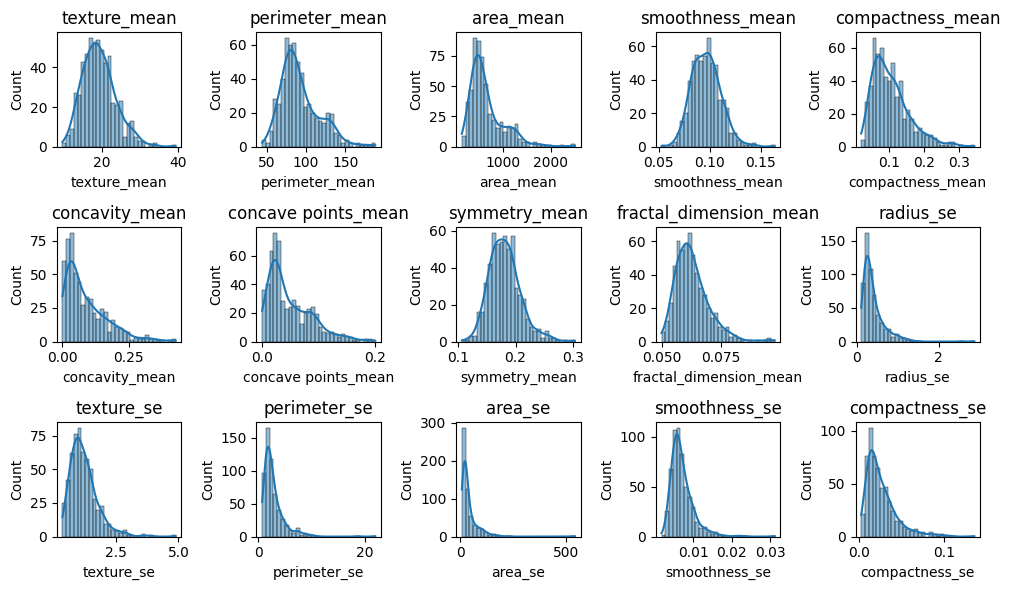

In [ ]:
#Distribution of features
num_features = min(15, len(df.columns[2:]))

#Create a figure with a specified size
plt.figure(figsize=(10, 6))

#Histograms
for i, feature in enumerate(df.columns[2:2+num_features], 1):
    plt.subplot(3, 5, i)
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

The dataset's features have varied distributions. Some features are approximately normally distributed. Others are skewed in their distribution. Proper data preprocessing and scaling are crucial due to these varied feature distributions.

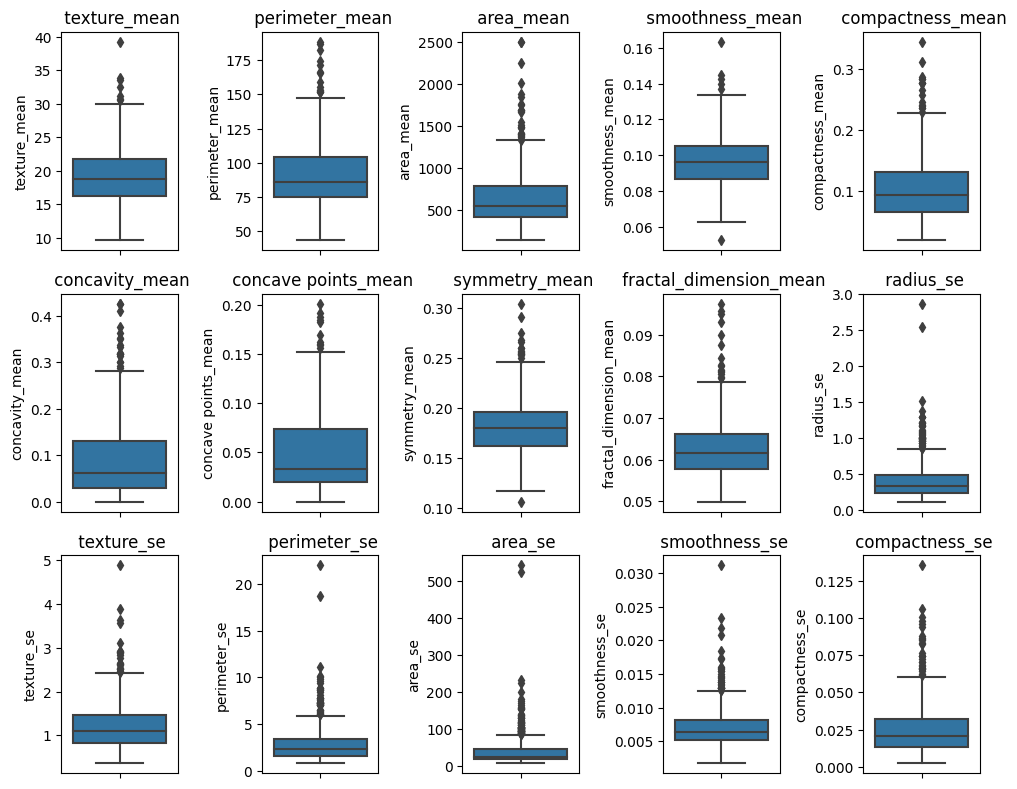

In [ ]:
#Check for outliers
num_features = min(15, len(df.columns[2:]))

#Box Plots
plt.figure(figsize=(10, 8))
for i, feature in enumerate(df.columns[2:2+num_features], 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f' {feature}')

plt.tight_layout()
plt.show()

The boxplot shows that there are outliers in all the features above of the dataset. Outliers are data points that are very different from the rest of the data. They are shown as individual points outside of the whiskers of the box in the boxplot.

In [ ]:
# Define a function to remove outliers
def remove_outliers(df, feature, threshold=3):
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers

# Define a threshold for outliers
outlier_threshold = 3

# Create a copy of the original DataFrame to work with
df = df.copy()

# Iterate through all the numerical features in the DataFrame
for feature in df.columns[2:]:  # Assuming that the first two columns are non-numeric
    df_no_outliers = remove_outliers(df_no_outliers, feature, outlier_threshold)

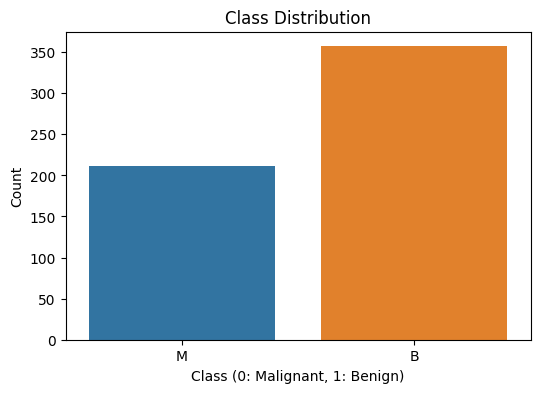

In [ ]:
#Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

 The class distribution bar plot shows that the dataset is imbalanced, with more benign than malignant cases. This skewed distribution has implications for machine learning modelling, as algorithms may have a tendency to favour the majority class (benign) during training, and it can make it difficult for machine learning models to predict the minority class (malignant) accurately.

### **3.2.2. Bivariate analysis**

<Figure size 400x200 with 0 Axes>

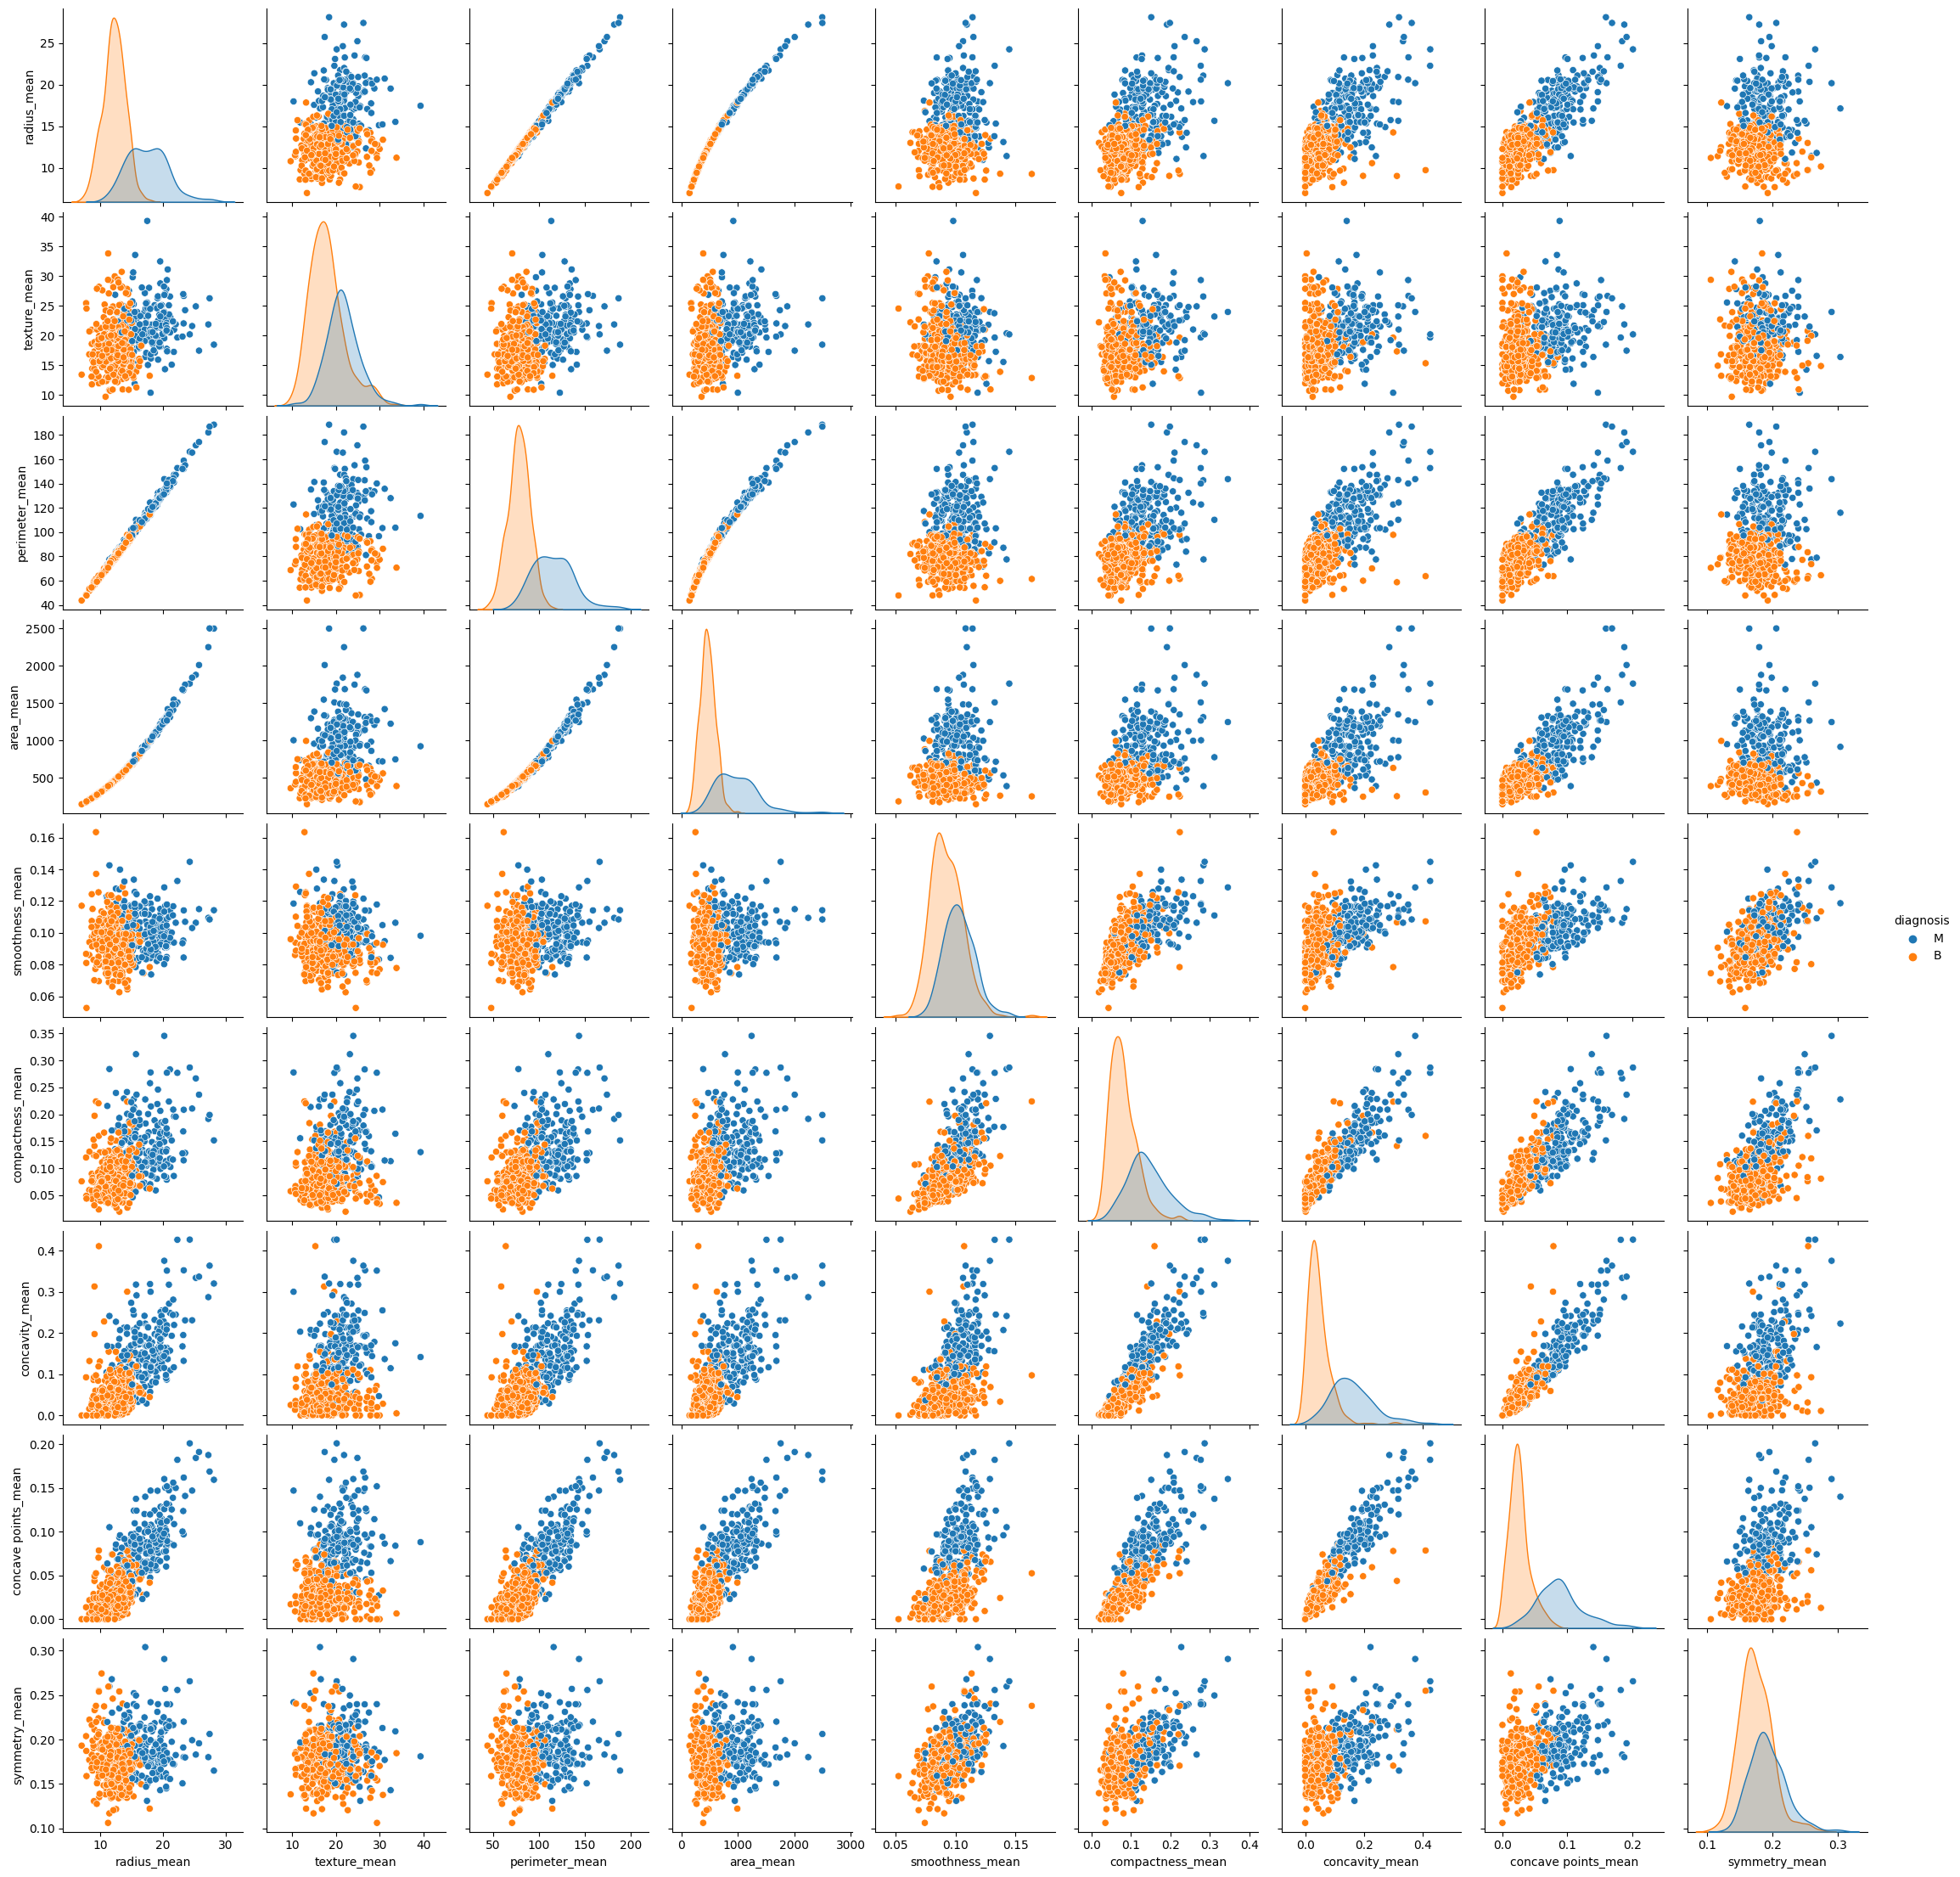

In [ ]:
# Scatter plots to explore relationships between pairs of continuous variables

selected_features = df.columns[1:10] # Select a subset of features for pairplot

# Pairplot for the selected features
plt.figure(figsize=(4, 2))
sns.pairplot(df, hue="diagnosis", vars=selected_features)
plt.show()

In the pairplot above, it becomes apparent that numerous features in the  dataset show high correlations with each other. Notably, the radius mean and area mean features are correlated with perimeter, indicating a strong linear relationship between these attributes. Additionally, features such as compactness mean and concavity mean also display pronounced correlations, suggesting that these characteristics convey interrelated information about the cellular properties under examination. These visualizations provide valuable insights into the dataset's feature interdependencies, which can guide feature selection and the development of predictive models, ensuring that the most informative attributes are leveraged in the analysis

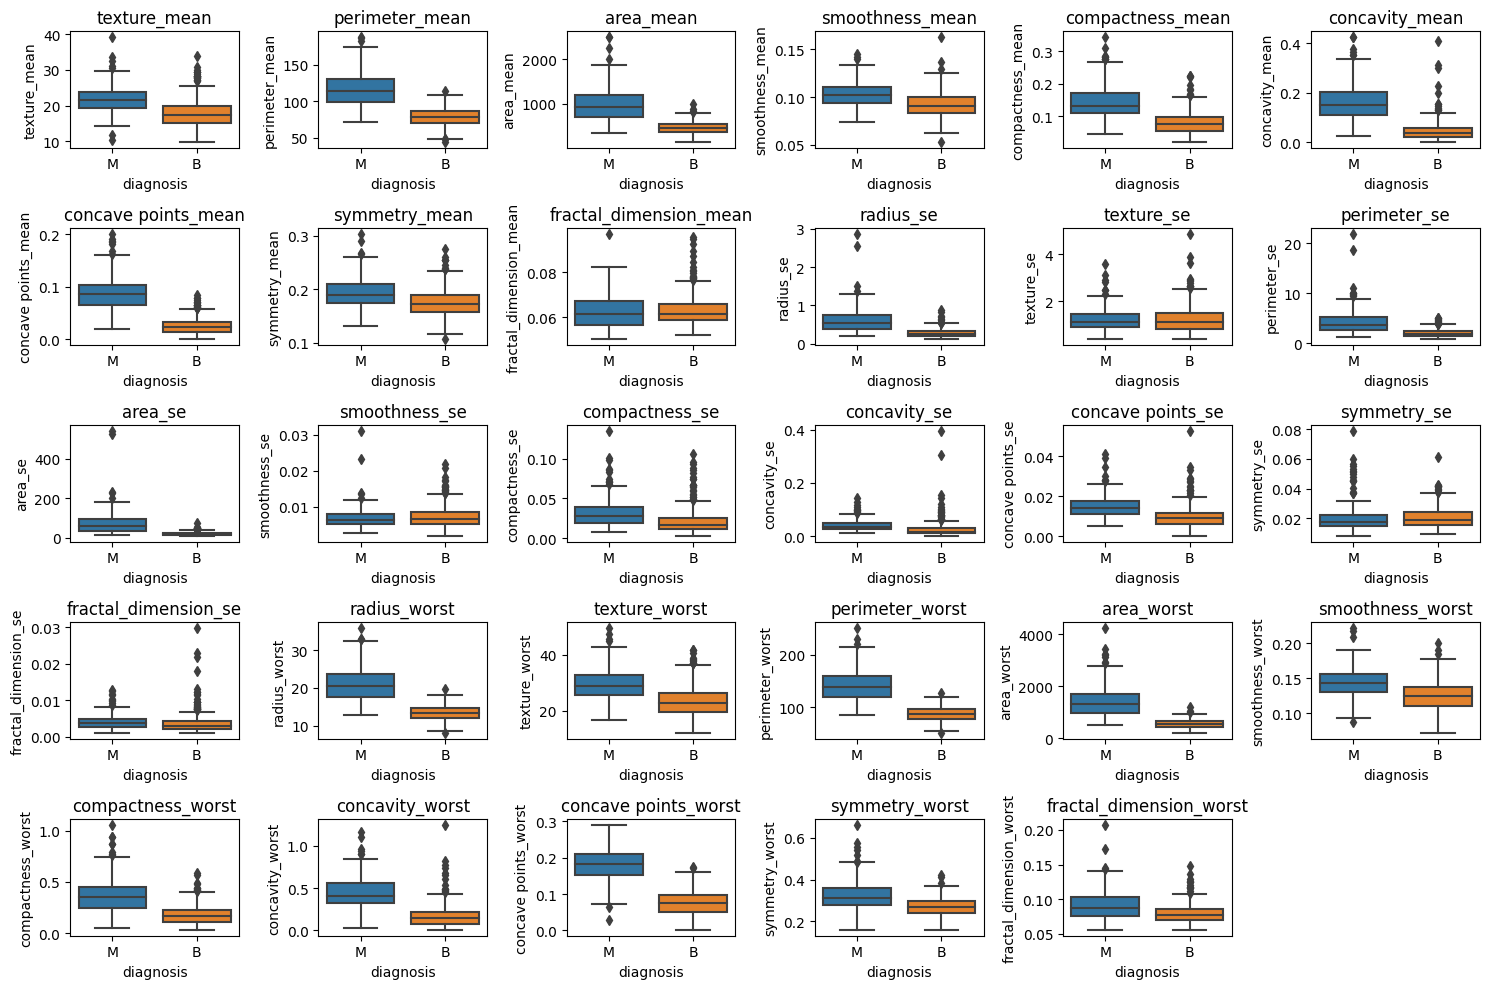

In [ ]:
#The relationship between continuous and categorical variables(Diagnosis) using box plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(df.columns[2:], 1):
    plt.subplot(5, 6, i)
    sns.boxplot(data=df, x="diagnosis", y=feature)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

Box plots illustrates the relationship between continuous variables and the diagnosis category (0 for malignant, 1 for benign) reveal variations in feature distributions across the two classes. These visualizations highlight differences in medians, interquartile ranges, and potential outliers. They aid in identifying features with distinct patterns between malignant and benign cases, serving as a crucial step in feature selection for modelling and classification tasks.We can say from the analysis that  malignant tumours tend to be larger and have rougher texture, more compactness, and irregular features such as concavity, and concave points than benign tumours.

### **3.2.3. Correlation analysis**

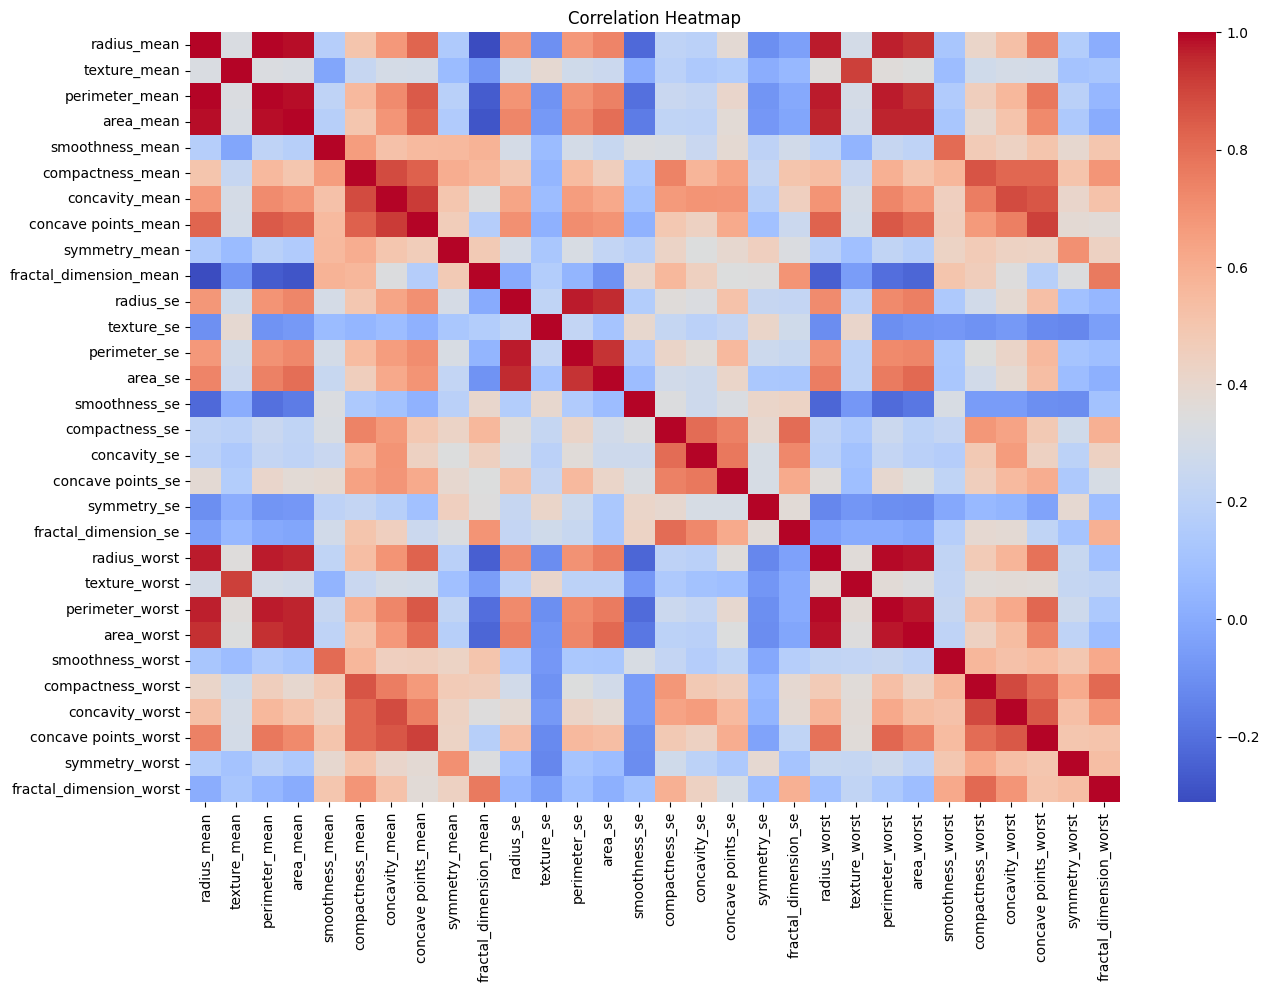

In [ ]:
#Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From figure above we can notice that the dataset shows that many features are highly correlated with each other. This means that these features are very similar to each other. For instance, the radius mean feature is highly correlated with the perimeter mean. This means that the perimeter of a cell is very similar to its mean radius. Other features that are highly correlated with each other include area mean and perimeter mean. This means that these features provide similar information about the radius-worst is highly correlated with radius-mean, and attributes related to cell shape are highly correlated with each other. These insights can be used to reduce dimensionality.

## **3.3. Missing values**

In [ ]:
# Check for and handle missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


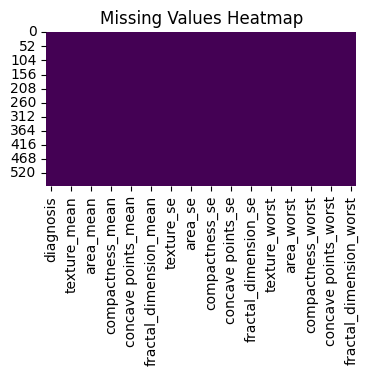

In [ ]:
# Visualize Missing Values using a Heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The dataset does not have any missing values and doen't not require any cleaning.

# **4. Data Pre-processing**

## **4.1. Handling missing values and duplicates**

In [ ]:
#Confirming if there are no missing values
df.isnull().values.any()

False

In [ ]:
df.duplicated().any()

False

Missing values and duplicated were checked, and there are no missing and duplicate values in the dataset.

## **4.2.Encoding categorical variables**

In [ ]:
#Converting Categorical data to numeric values (B: 0, M: 1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Check the unique values in the new numeric column
print("Unique Numeric Values in 'diagnosis':", df['diagnosis'].unique())

Unique Numeric Values in 'diagnosis': [1 0]


Encoding categorical variables was performed using label encoding, which efficiently transformed categorical variables into a binary format suitable for machine learning models.

## **4.3. Data Preprocessing**

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Feature scaling is performed using min max scaling on all numerical features.

In [ ]:
#Feature scaling
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

##**4.4. Data Splitting**

In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#**5. Modelling**

##**5.1. Pricipal Component Analysis(PCA)**

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Fit and transform the PCA on your training data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pca_df = pd.DataFrame(X_pca,columns=["p1","p2"])
pca_df["diagnosis"] = y

In [ ]:
#Get the explained variance for the retained components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.52073044 0.18045193]


In [ ]:
X_scaled.shape

(569, 30)

In [ ]:
#Shape of new data after applying PCA
X_pca.shape

(569, 2)

In [ ]:
X_pca

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115],
       ...,
       [ 0.22631131, -0.28794577],
       [ 1.67783369,  0.33594595],
       [-0.90506804, -0.10410875]])

Text(0, 0.5, 'Second Principal Component')

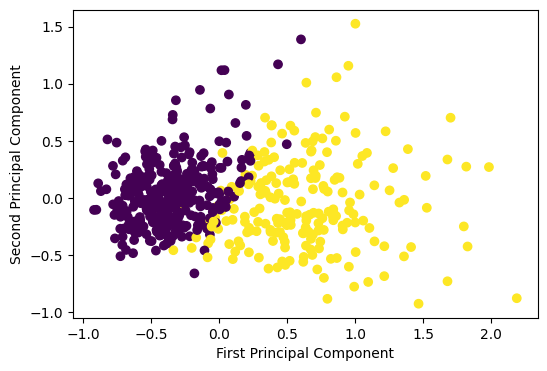

In [ ]:
#plotting based on diagnosis values
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['diagnosis'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.53097689, 0.1728349 ])

PCA was applied to reduce the dimensionality of the dataset while retaining as much variance as possible. Two principal components were retained for visualization.



In [ ]:
pca.components_

array([[ 2.42675774e-01,  9.64786101e-02,  2.52550175e-01,
         2.16494530e-01,  1.09694618e-01,  2.40397602e-01,
         3.01914206e-01,  3.22475470e-01,  1.11431911e-01,
         4.32983397e-02,  1.21760615e-01, -3.91796003e-05,
         1.18580603e-01,  1.03569266e-01, -4.68418094e-03,
         1.29319789e-01,  6.56807080e-02,  1.24746120e-01,
         1.44902467e-02,  4.55013416e-02,  2.59386850e-01,
         1.13833007e-01,  2.60708399e-01,  2.05917767e-01,
         1.23773566e-01,  2.04993413e-01,  2.44083623e-01,
         3.71065064e-01,  9.59229054e-02,  9.46335142e-02],
       [-2.61316697e-01, -5.90579194e-02, -2.38590061e-01,
        -2.31106830e-01,  1.99883951e-01,  2.13914883e-01,
         1.13810591e-01, -8.31206237e-03,  2.11115126e-01,
         4.06392087e-01, -6.68985209e-02,  6.00114468e-02,
        -5.14164640e-02, -8.29631528e-02,  1.35596439e-01,
         2.22352585e-01,  1.02792720e-01,  1.05646780e-01,
         1.40474907e-01,  1.71995173e-01, -2.44281614e-

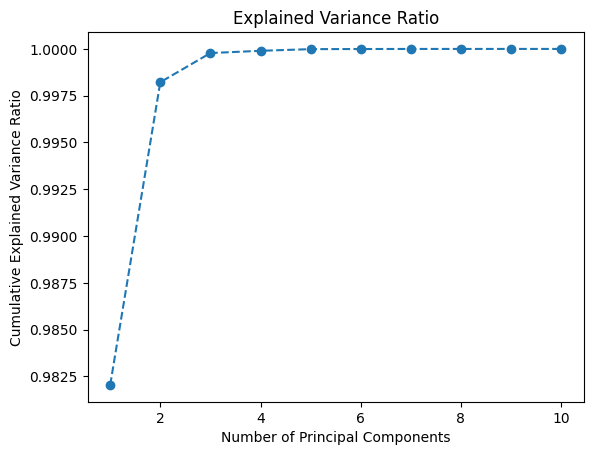

In [ ]:
# Create a PCA model
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Visualize explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Find the number of components that explain at least 95% of the variance
n_components_to_reach_95_percent = (cumulative_variance_ratio >= 0.95).sum()

print(f"Number of components to explain 95% of variance: {n_components_to_reach_95_percent}")


Number of components to explain 95% of variance: 10


## **5.2. K-Means Clustering**

While no ground truth labels are available in this unsupervised setting, performance metrics like the silhouette score can provide insights into the quality of clustering. Silhouette analysis can help assess how well-separated the clusters are.

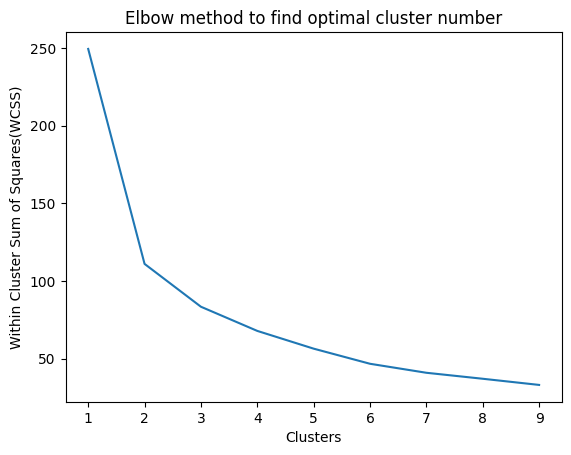

In [ ]:
WCSS = []   #WCSS stands for Within Cluster Sum of Squares
for i in range(1,10):      #the for loop calculates the WCSS for each no.of cluster
  kmeans = KMeans(n_clusters=i, init='random', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(X_pca)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,10), WCSS)
plt.title('Elbow method to find optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()

In [ ]:
#Determine the optimal number of clusters for K-Means using the silhouette score
silhouette_scores = []

for n_clusters in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#Find the number of clusters with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2

#Output the optimal number of clusters and corresponding silhouette score
print(f'Optimal Number of Clusters: {optimal_k}')
print(f'Silhouette Score: {silhouette_scores[optimal_k - 2]}')

Optimal Number of Clusters: 2
Silhouette Score: 0.5274962751486783


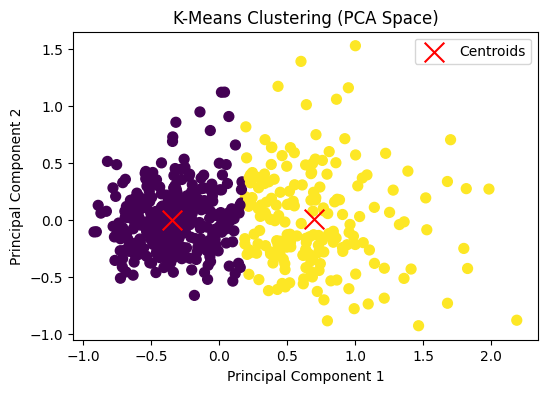

In [ ]:
# Based on the optimal number of clusters
optimal_k = 2

# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters in 2D space (PCA space)
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (PCA Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

K-Means clustering was employed on the PCA-transformed data. We chose to cluster the data into two clusters based on the binary nature of the breast cancer diagnosis (benign or malignant).

The key findings from K-Means clustering are as follows:

**Cluster Separation**

K-Means successfully separated the data into two distinct clusters, corresponding to benign and malignant cases.

**Cluster Visualization**

Visualizations of the clusters using the first two principal components showed clear separation between the two clusters.


In [ ]:
#Specify the number of clusters
k = 2

# Create a K-Means instance and fit it to the PCA-transformed data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## **5.3. Model evaluation**

In [ ]:
#Evaluate K-Means clustering using silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.53


The K-Means clustering model's performance was evaluated, yielding a Silhouette Score of 0.53 for the optimal 2 clusters.The silhouette score can provide insights into the quality of clustering. Silhouette analysis can help assess how well-separated the clusters are.

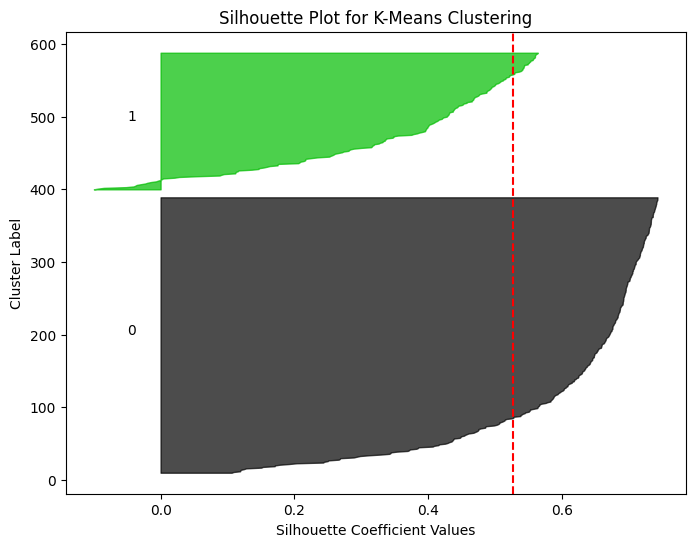

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Compute silhouette scores for each data point
sample_silhouette_values = silhouette_samples(X_pca, kmeans.labels_)

# Create a silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# The vertical dashed line represents the average silhouette score.
plt.show()

The silhouette plot helps to illustrates how close data points within one cluster are to those in neighboring clusters. It's a visual way to assess factors like the number of clusters, and it produces scores between -1 and 1 to show data patterns.

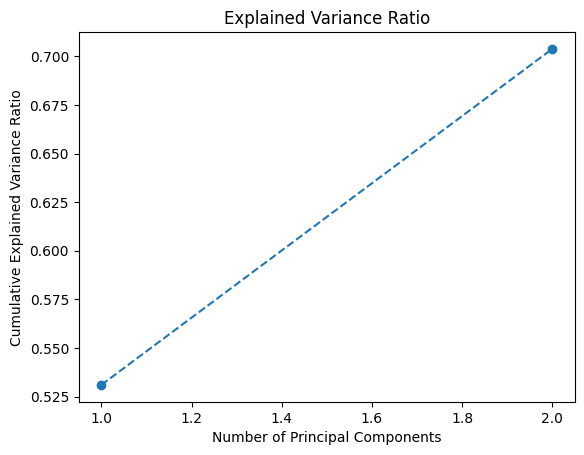

In [ ]:
#Check explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#Visualize explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

**Model testing**

In [ ]:
from sklearn.linear_model import LogisticRegression
original_model = LogisticRegression()
original_model.fit(X_train, y_train)

print("Model Accuracy (Original Data): {:.5f}%".format(original_model.score(X_test, y_test) * 100))

Model Accuracy (Original Data): 98.24561%


In [ ]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)
pca_train = pd.DataFrame(pca.transform(X_train), columns=["PC" + str(i + 1) for i in range(n_components)])
pca_test = pd.DataFrame(pca.transform(X_test), columns=["PC" + str(i + 1) for i in range(n_components)])
pca_train

,PC1,PC2
0,0.445849,1.189845
1,1.521691,0.178700
2,-0.494587,0.400806
3,-0.419136,0.114216
4,-0.528228,0.348397
...,...,...
450,-0.311067,0.868792
451,-0.121656,0.273085
452,-0.635425,-0.475333
453,0.219717,0.116169


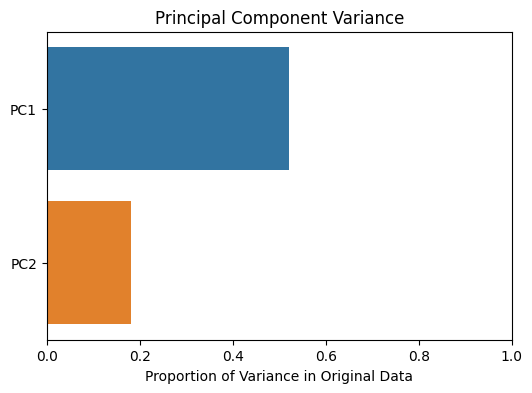

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

The bar plot that displays the explained variance for each principal component after performing PCA. It shows the contribution of each component to the overall variance in the data.

In [ ]:
# Testing on the principal components
pca_model = LogisticRegression()
pca_model.fit(pca_train, y_train)

print("Model Accuracy (PCA Data): {:.5f}%".format(pca_model.score(pca_test, y_test) * 100))

Model Accuracy (PCA Data): 96.49123%


**Explained Variance**

The first two principal components explained a cumulative variance of approximately 66%, indicating that a significant portion of the original data's variability was captured.


Number of clusters:  2

Silhouette score =  0.5274962751486783

Number of clusters:  3

Silhouette score =  0.47932787049190845

Number of clusters:  4

Silhouette score =  0.3889205689599353

Number of clusters:  5

Silhouette score =  0.337398401154039


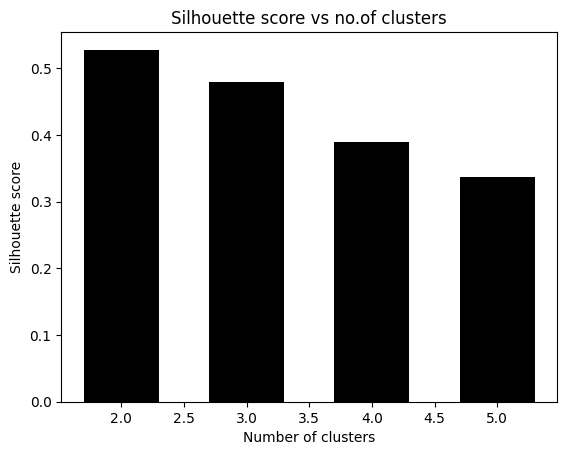

In [ ]:
#calculating the performance of the algorithm
from sklearn import metrics

scores=[]
range_values = np.arange(2,6)

for i in range_values:
  kmeans = KMeans(n_clusters=i, init='random', n_init = 10, random_state=0)
  kmeans.fit(X_pca)
  score = metrics.silhouette_score(X_pca, kmeans.labels_, metric = 'euclidean', sample_size = len(X_pca))

  print('\nNumber of clusters: ', i)
  print('\nSilhouette score = ', score)

  scores.append(score)

#plotting the scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs no.of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# **6. Conclusion**

##**6.1. Summary**

In this analysis, we applied PCA and k-Means clustering to the Breast Cancer Wisconsin (Diagnostic) Dataset. PCA was employed to reduce the dimensionality of the breast cancer dataset while preserving as much variance as possible. By visualizing the explained variance ratio, it was determined that retaining two principal components captures a significant portion of the data's variance.PCA successfully reduced dimensionality while retaining essential information. K-Means clustering revealed the presence of two clusters within the data, although their clinical significance requires further investigation.

##**6.2. Implications**

Dimensionality reduction via PCA can be valuable for data visualization and preprocessing. K-Means clustering may help identify patient subgroups based on similar features, potentially aiding in providing tailored treatment or diagnosis to an individual. The analysis demonstrates the potential of machine learning in early breast cancer diagnosis, reduced human error, and resource optimization in healthcare.




## **6.3. Recommendations**

The following are recommendations:

1. Explore the use of advanced techniques such as deep learning for tumour
classification and ensemble methods.

2. Enhance the dataset by applying feature engineering techniques. This includes extracting valuable information from mammographic images, combining existing features to create new informative ones, and considering domain-specific knowledge to enrich the dataset.

3. Engage with medical professionals to leverage their domain expertise. Their insights can help in selecting the most relevant features, refining the model's performance, and ensuring that the model aligns with medical knowledge and best practices.

4. Continuously update and fine-tune the model with fresh data. The ongoing training process will ensure that the model remains current, adapting to evolving medical insights and data trends, ultimately maintaining its accuracy and relevance.



The dataset opened my eyes to the power of analytics, revealing that not everything is as straightforward as it may seem. Diagnosing breast cancer is a complex process that demands a deep understanding of the data and a keen eye for patterns. It's not just about crunching numbers; it's about uncovering the hidden insights within the data that can ultimately save lives. The choice of the Breast Cancer Wisconsin dataset served as a fascinating entry point into the healthcare analytics domain. It includes a rich collection of features derived from breast mass samples, aimed at distinguishing between benign and malignant tumours.  Analyzing the various features of the dataset, such as radius, texture, and compactness, taught me that each data point holds a piece of the puzzle. The journey from raw data to meaningful conclusions is a challenging one, but it's a journey that brings a sense of purpose. In this process, I realized that there's so much more to learn and explore in the field of healthcare analytics. It's a field where every discovery can make a significant impact, shaping a better future for all.

Breast cancer is a pressing healthcare issue with complex diagnostic challenges. The project's objective was clear, to conduct a comprehensive exploratory data analysis (EDA) and evaluate the potential of principal component analysis (PCA) and k-Means clustering in improving breast cancer diagnosis. The emphasis on diagnostic accuracy and patient-centric care made this project unique. It underscored the real-world implications of data analysis in healthcare, which extends far beyond numbers and statistics. The project's conclusion demonstrated the power of PCA in dimensionality reduction and the potential of k-Means clustering for identifying patient clusters based on similar features. The insight that two principal components could capture a significant portion of data variance is particularly valuable. While the clinical significance of the clusters requires further investigation, the analysis laid the groundwork for more in-depth research in this area.

The conclusion showcased the effectiveness of Principal Component Analysis (PCA) in simplifying complex data. It was remarkable to find that just two principal components could represent a significant portion of the data. This discovery indicated the power of data reduction techniques in streamlining the analysis process. Although the existence of clusters in the data was intriguing, their clinical implications remained somewhat unclear, leaving room for further investigation, it was truly exciting, as it highlighted the dynamic and evolving nature of data analysis in the field of healthcare. In the complex world of healthcare analytics, I realized that the road ahead is filled with challenges and opportunities for learning. It's a journey where each piece of information contributes to the bigger picture, and where every revelation has the potential to enhance our understanding of the world of medicine.